In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import math

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Load data
df_boston_raw = pd.read_csv('boston_housing_data.csv')
df_boston_raw.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# EDA
- Table Information

field explanation:
| Data    | Keterangan                                                 |
|---------|------------------------------------------------------------|
| crim    | Rata-rata kasus kriminal di kota                           |
| zn      | Proporsi lahan perumahan yang dibagi untuk kavling         |
| indus   | Proporsi luas lahan untuk bisnis non-retail                |
| chas    | Variabel dummy (0 = batas wilayah sungai, 1 = tidak)       |
| nox     | Konsentrasi nitrogen oksida                                |
| rm      | Jumlah rata-rata kamar                                     |
| age     | Proporsi umur unit rumah yang dibangun                     |
| dis     | Rata-rata jarak menuju sentra bisnis dan industri          |
| rad     | Indeks aksesibilitas jalan raya                            |
| tax     | Tarif pajak properti ($10000)                              |
| ptratio | Rasio murid dan guru                                       |
| black   | Jumlah populasi orang kulit hitam                          |
| lstat   | Status populasi yang lebih rendah                          |
| medv    | Nilai rata-rata pemilik rumah ($1000)                      |

## Statistic Descriptive

In [3]:
df_boston_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df_boston_raw.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_boston_raw.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

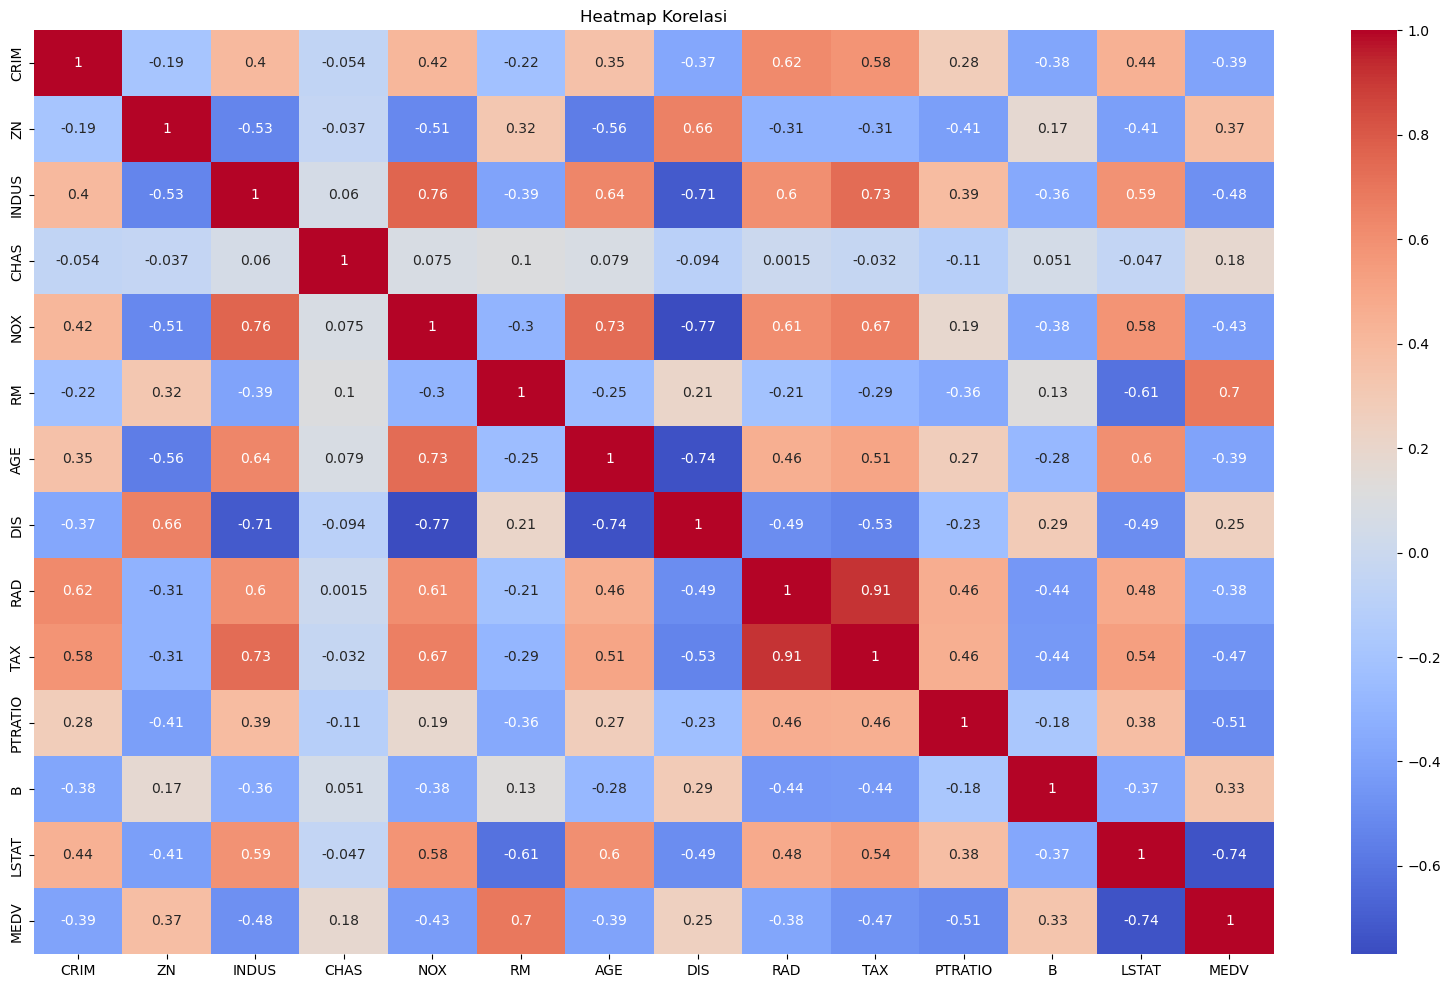

In [6]:
# Korelasi antar variabel
corr = df_boston_raw.corr()

# Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

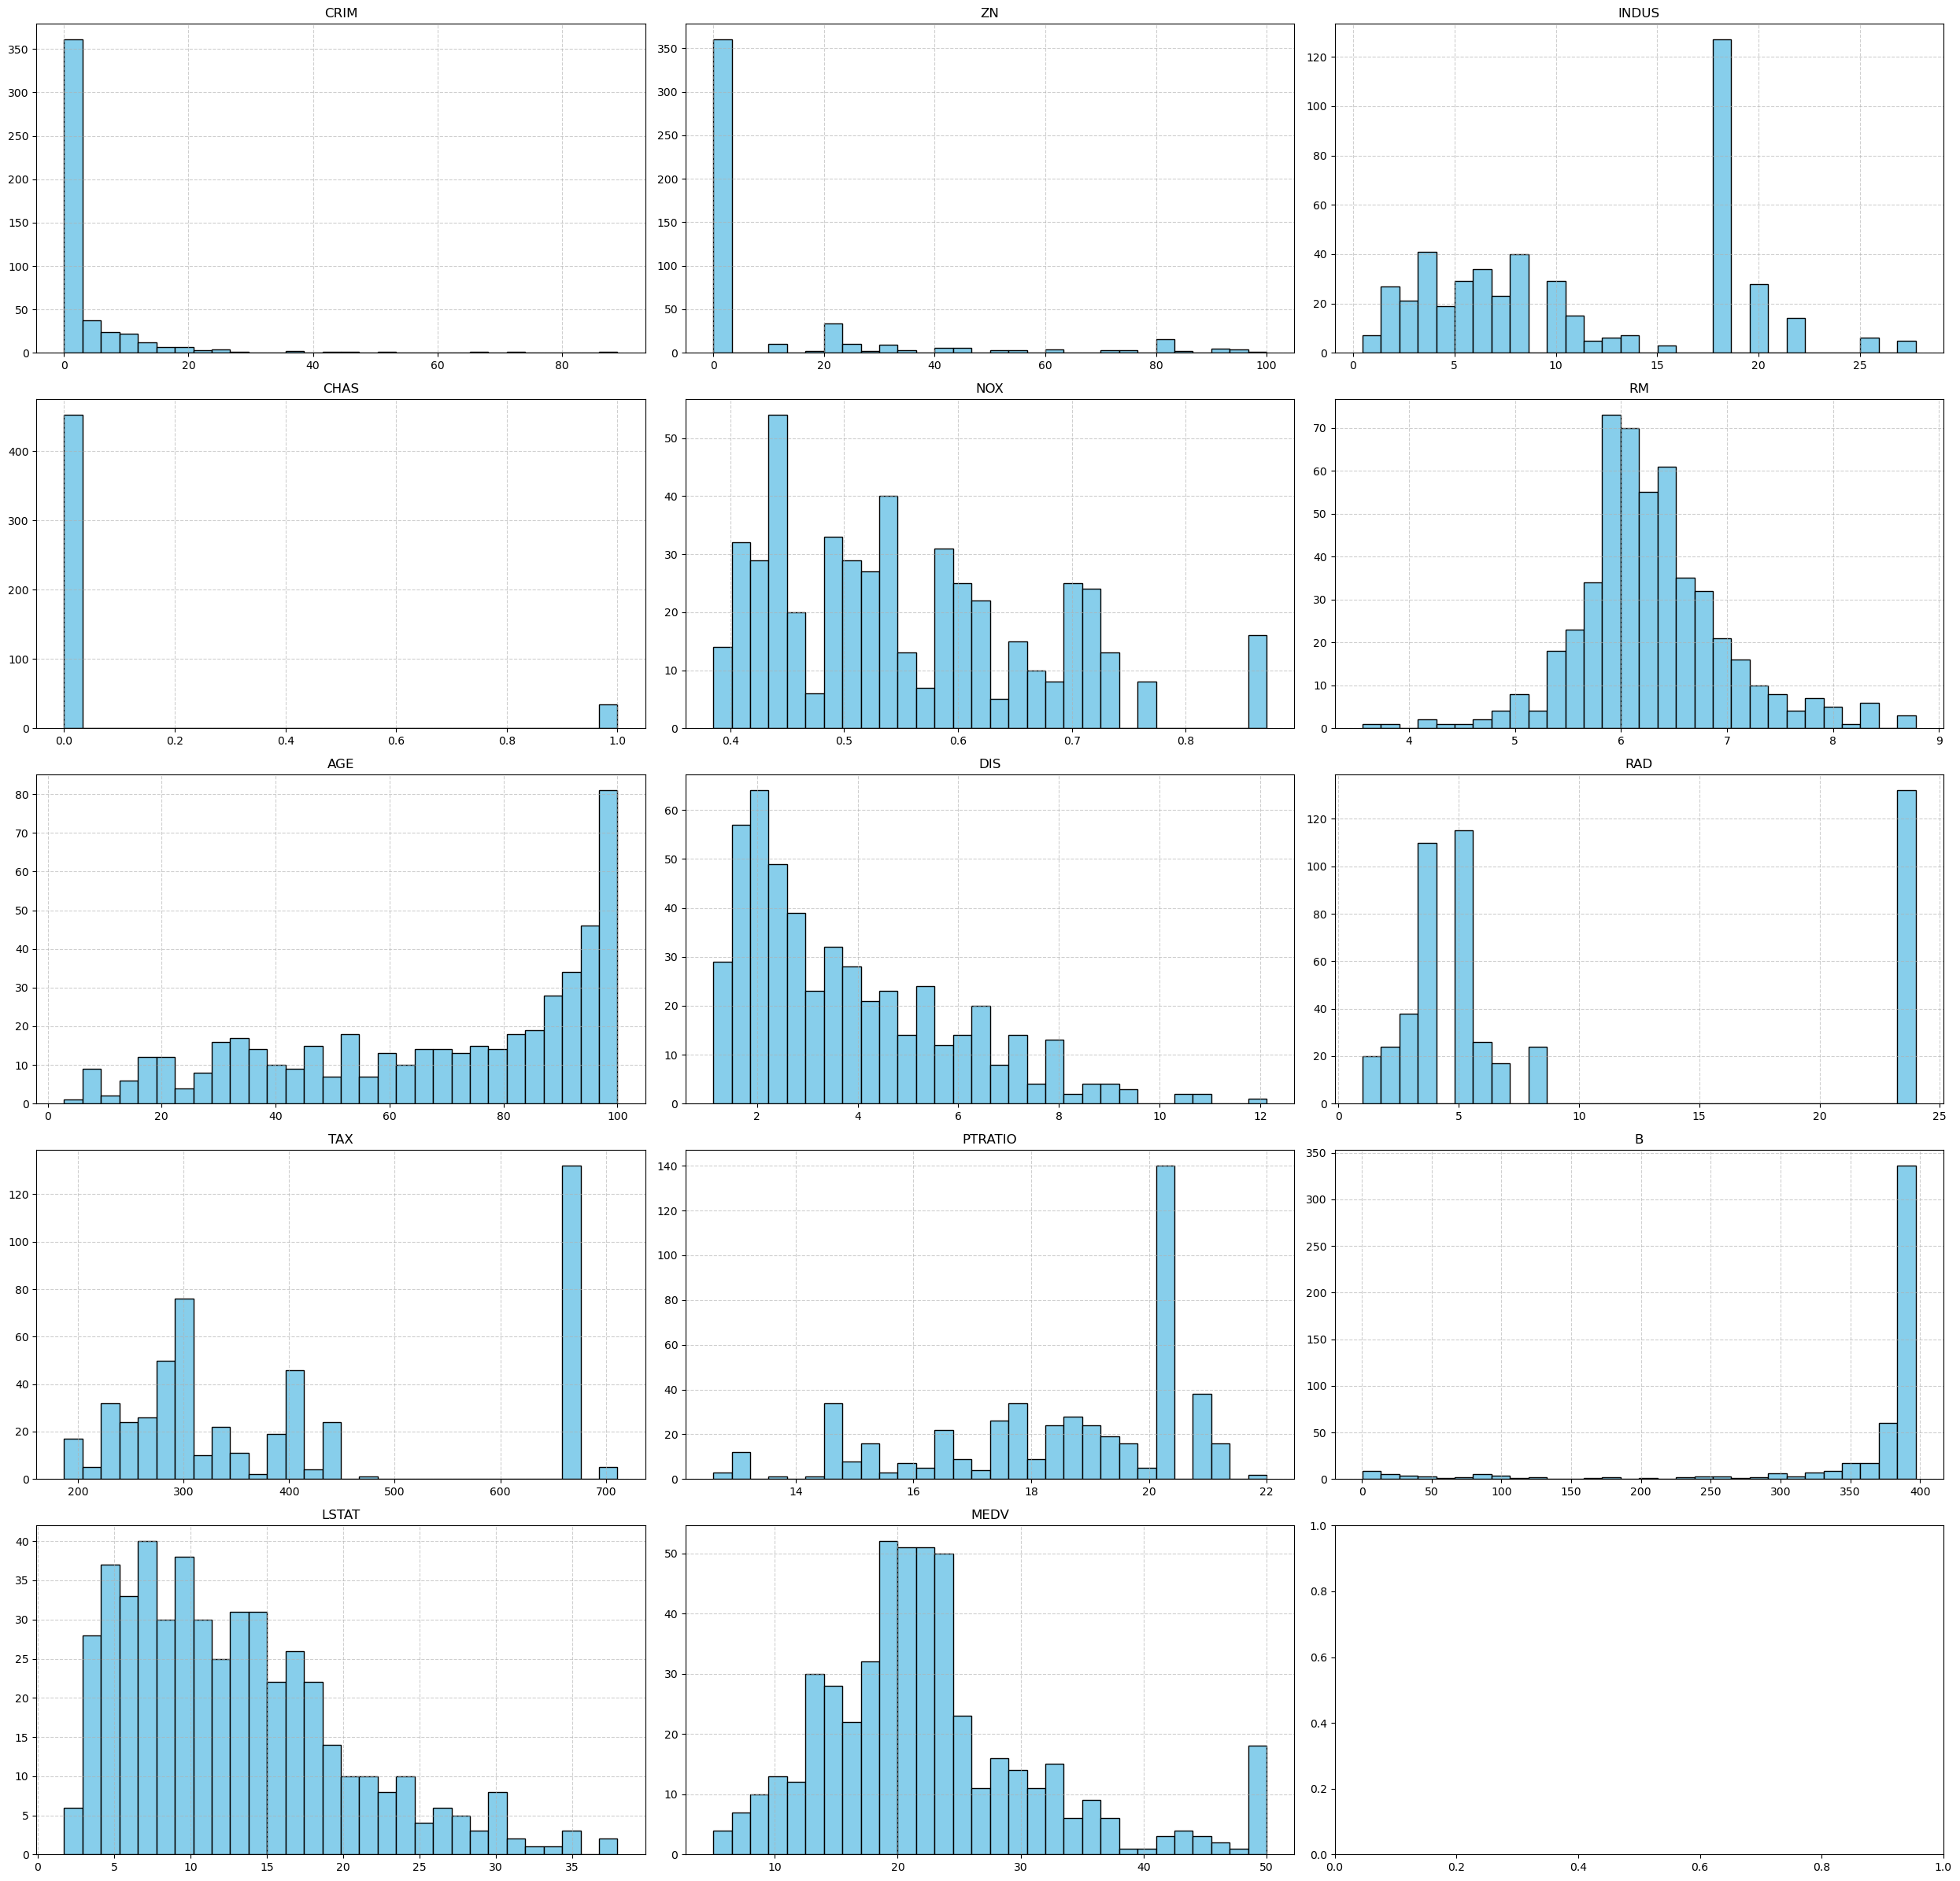

In [7]:

# Ukuran figure disesuaikan (misalnya 18x24 biar jelas)
fig, axes = plt.subplots(5, 3, figsize=(25, 24))
axes = axes.flatten()  # ubah jadi array 1D untuk iterasi mudah

for i, col in enumerate(df_boston_raw.columns):
    axes[i].hist(df_boston_raw[col], bins=30,
                 color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

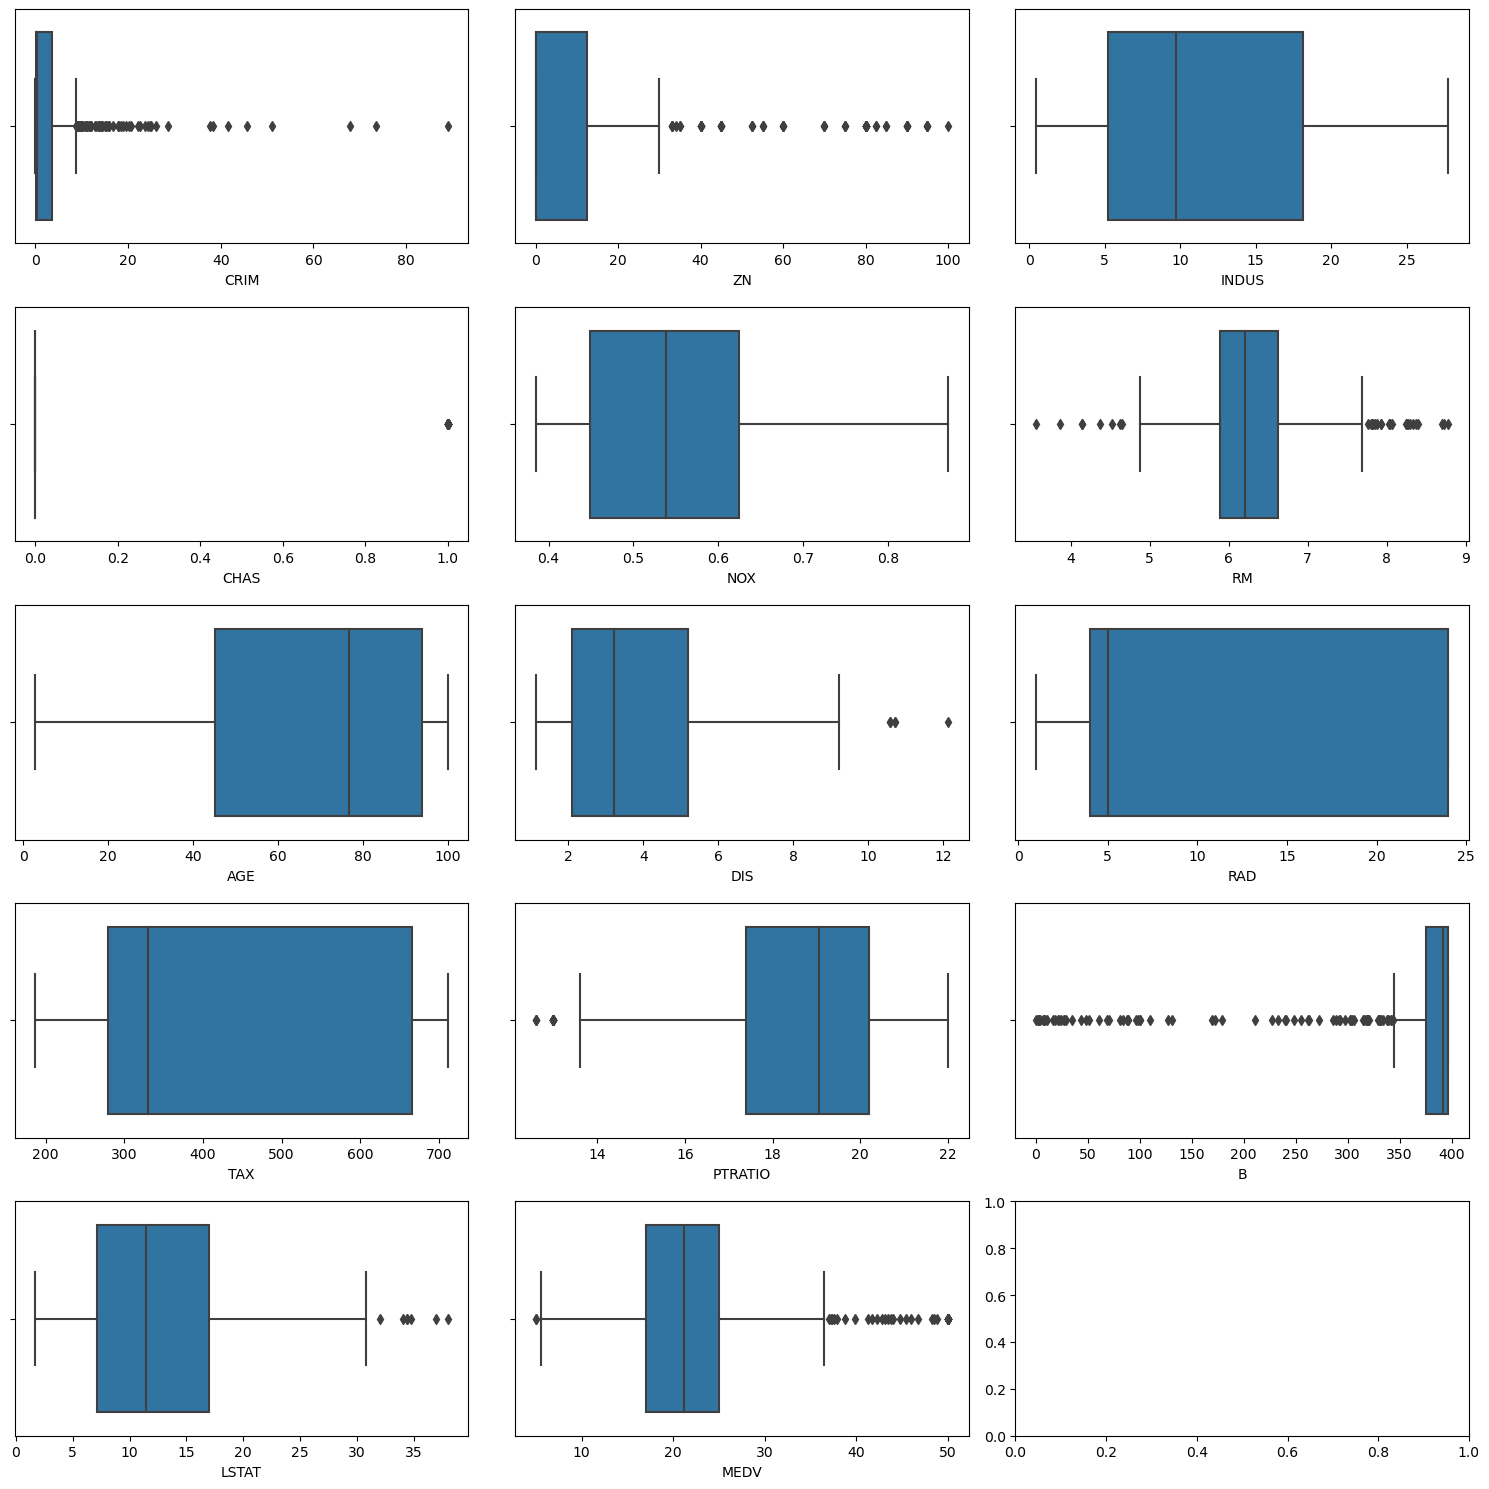

In [9]:
# Create a figure and a set of subplots with as many rows as needed and 3 columns
num_rows = (len(df_boston_raw.columns) + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 15))

# Create a boxplot for each column in the DataFrame
for i, col in enumerate(df_boston_raw.columns):
    sns.boxplot(data=df_boston_raw, x=col, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

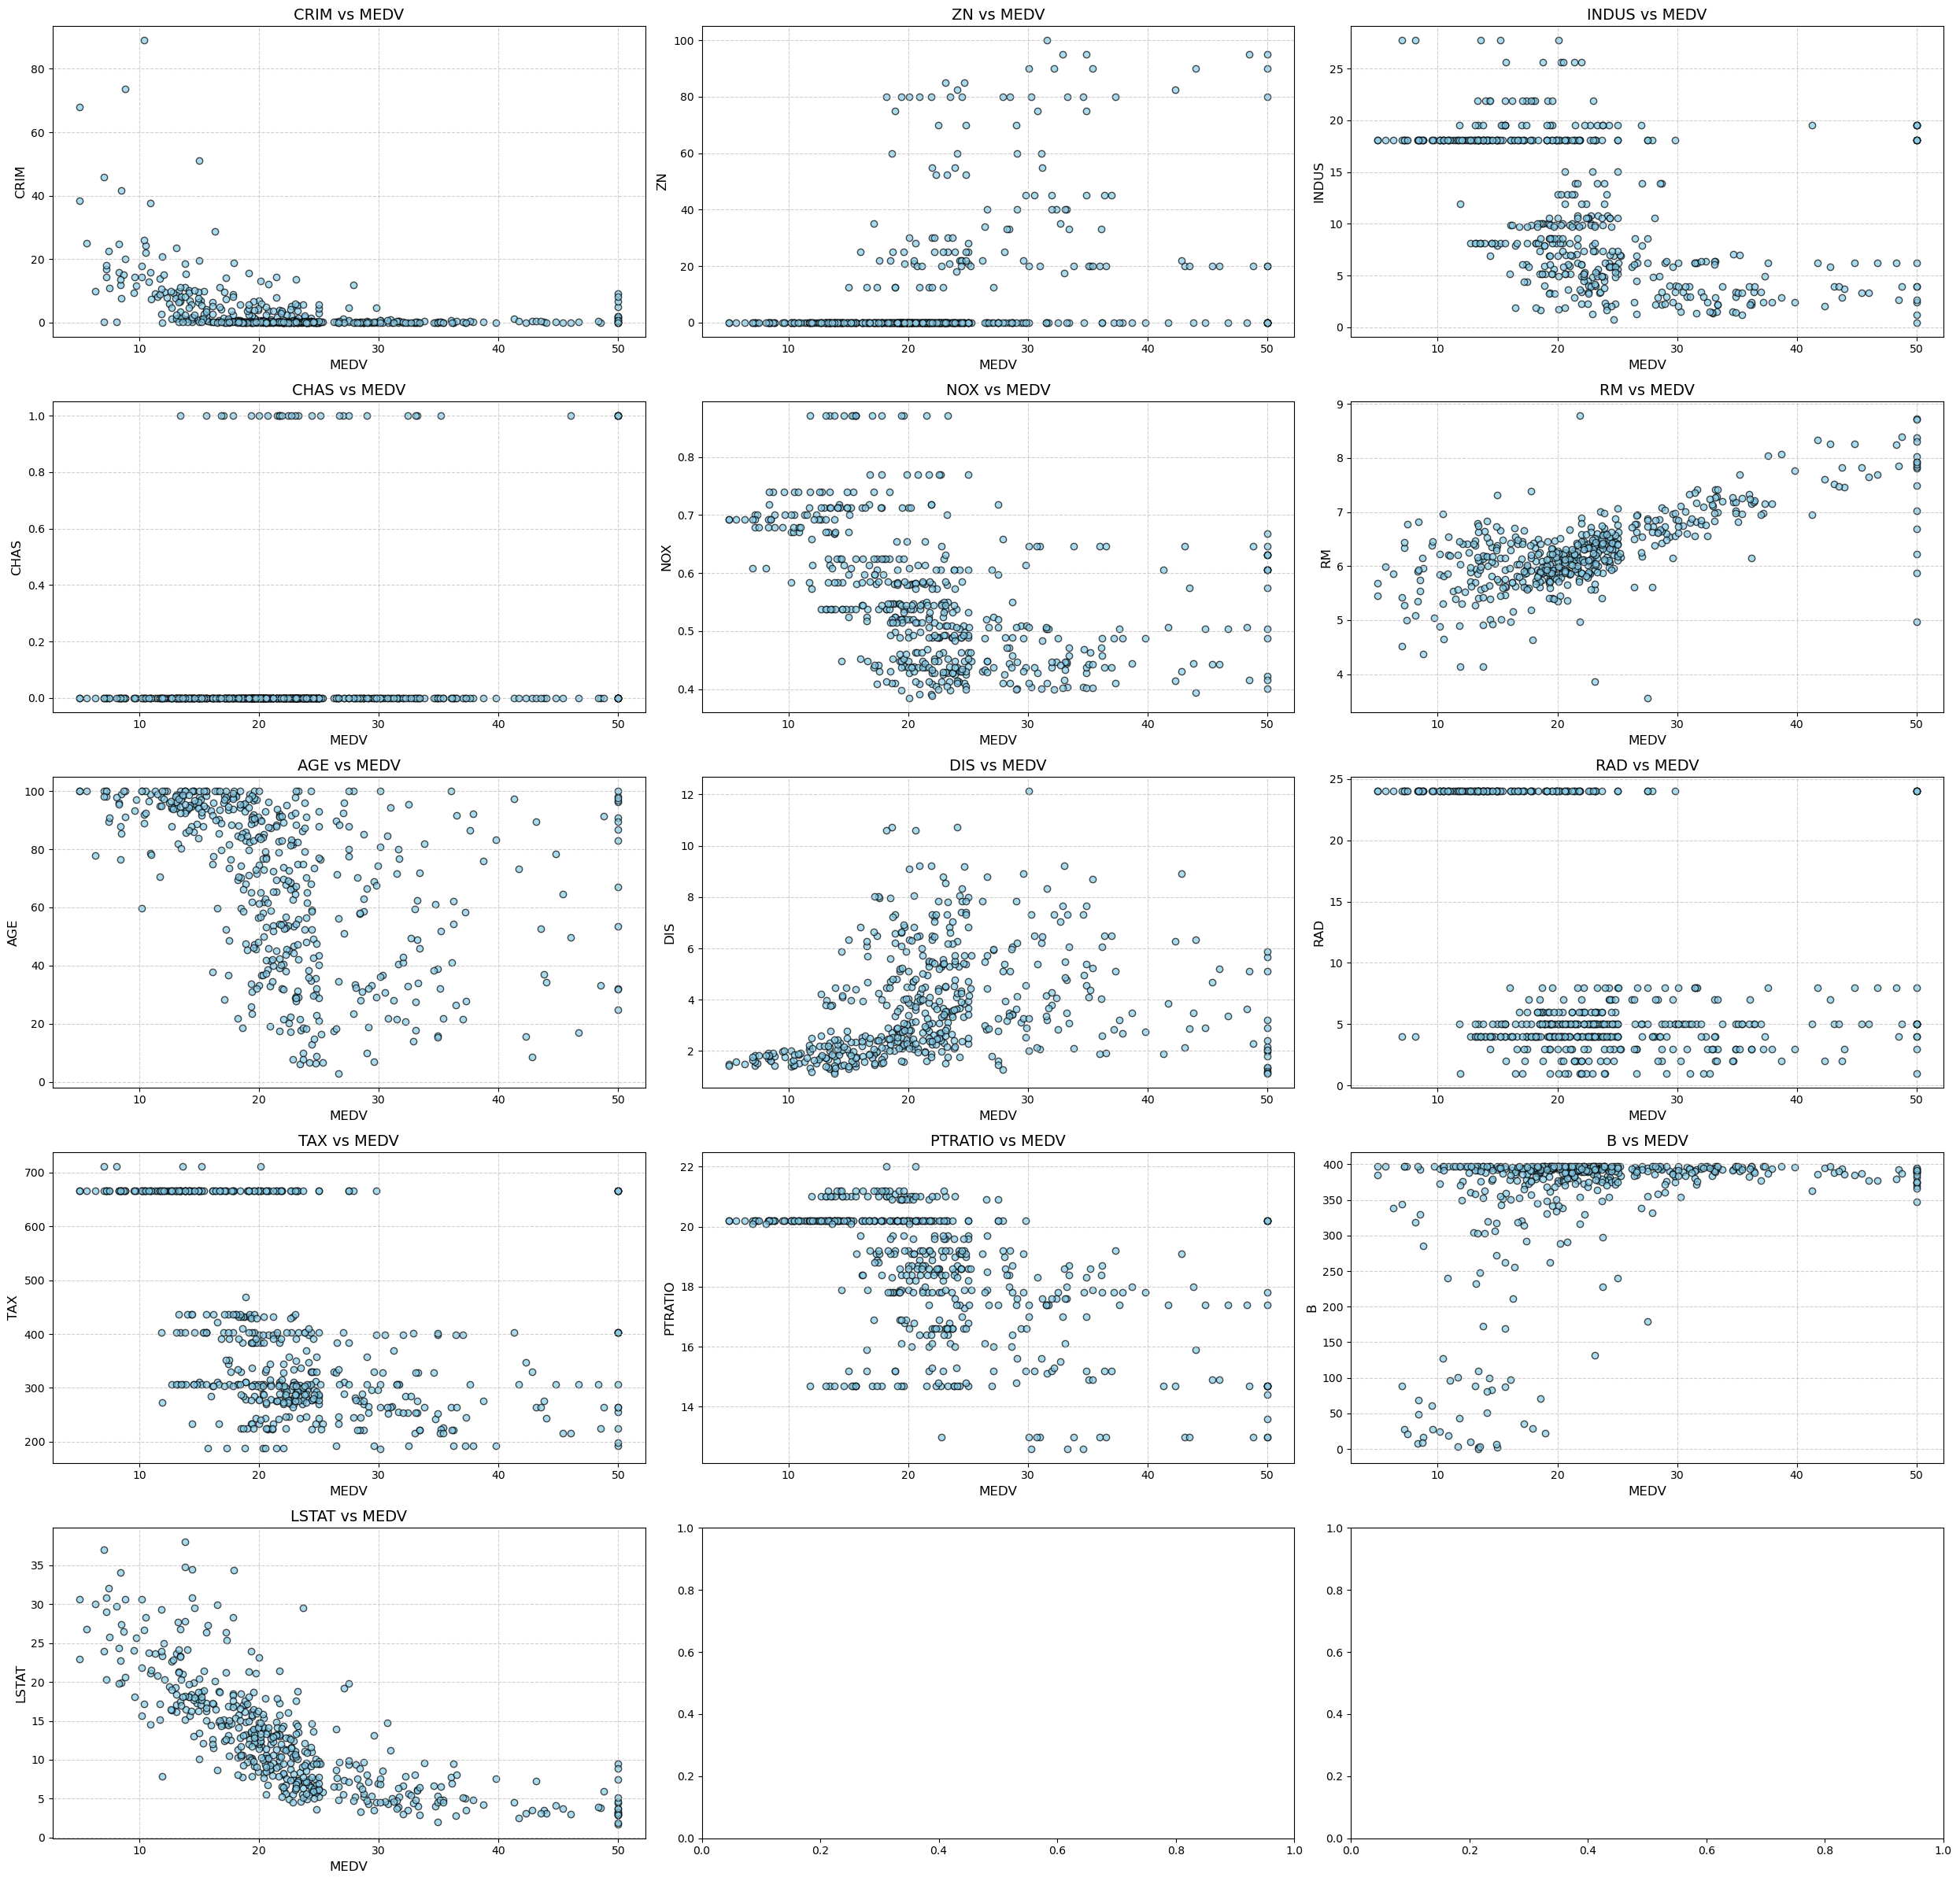

In [10]:
# Tentukan jumlah baris & kolom grid
fig, axes = plt.subplots(5, 3, figsize=(25, 24))
axes = axes.flatten()

# Loop semua kolom kecuali target MEDV
for i, col in enumerate(df_boston_raw.drop(columns='MEDV').columns):
    axes[i].scatter(df_boston_raw['MEDV'], df_boston_raw[col],
                    c='skyblue', edgecolors='black', alpha=0.7)

    axes[i].set_title(f"{col} vs MEDV", fontsize=14)
    axes[i].set_xlabel("MEDV", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Kesimpulan statistic descriptive** 
- Korelasi positif terbesar ada di RM dan negatif di  --> Semakin besar ruangan tentu harga semakin naik semakin rendah populasi(padat penduduk) harga semakin rendah.
- Tidak bertujuan rasis namun hubungan antara populasi kulit hitam dan medv sepertinya semakin rendah atau tinggi populasi tidak benar-benar mempengaruhi harga dari rumah tersebut.
- Terdapat beberapa data outlier di kolom CRIM, ZN, RM, DIS, B, LSTAT, dan MEDV fitur-fitur ini juga memiliki beberapa data missing mungkin nanti akan diprocess dengan mengisi value dengan melihat distribusi dari setiap kolom
- Semakin tinggi tax yang justru semakin rendah harga-harga rumah. Ini menarik karena perlu dilihat bagaimana rumah - rumah yang memiliki tax tinggi kondisinya

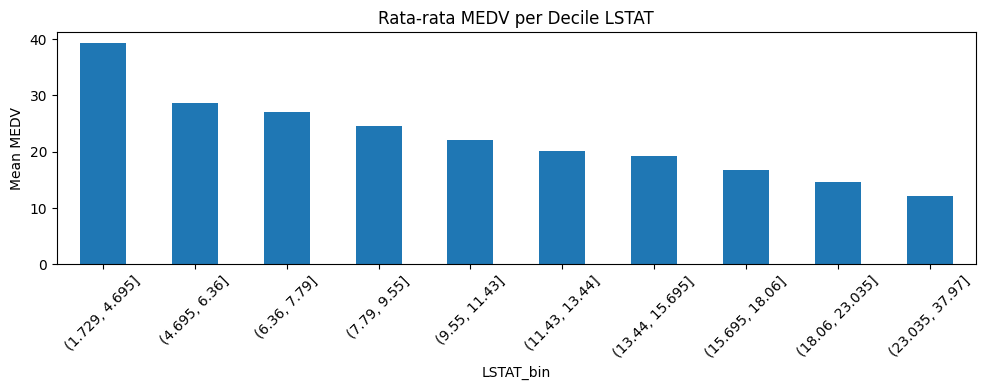

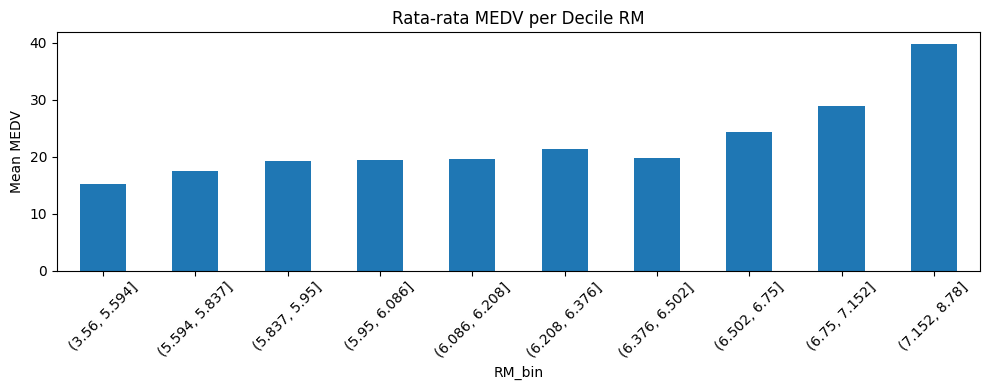

In [5]:
# Binning LSTAT & lihat rata-rata MEDV per bin
df_tmp = df_boston_raw[["LSTAT", "MEDV"]].copy()
df_tmp["LSTAT_bin"] = pd.qcut(df_tmp["LSTAT"], q=10, duplicates="drop")
medv_by_bin = df_tmp.groupby("LSTAT_bin")["MEDV"].mean()

plt.figure(figsize=(10,4))
medv_by_bin.plot(kind="bar")
plt.title("Rata-rata MEDV per Decile LSTAT")
plt.ylabel("Mean MEDV")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Binning RM & lihat rata-rata MEDV
df_tmp2 = df_boston_raw[["RM", "MEDV"]].copy()
df_tmp2["RM_bin"] = pd.qcut(df_tmp2["RM"], q=10, duplicates="drop")
medv_by_bin2 = df_tmp2.groupby("RM_bin")["MEDV"].mean()

plt.figure(figsize=(10,4))
medv_by_bin2.plot(kind="bar")
plt.title("Rata-rata MEDV per Decile RM")
plt.ylabel("Mean MEDV")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

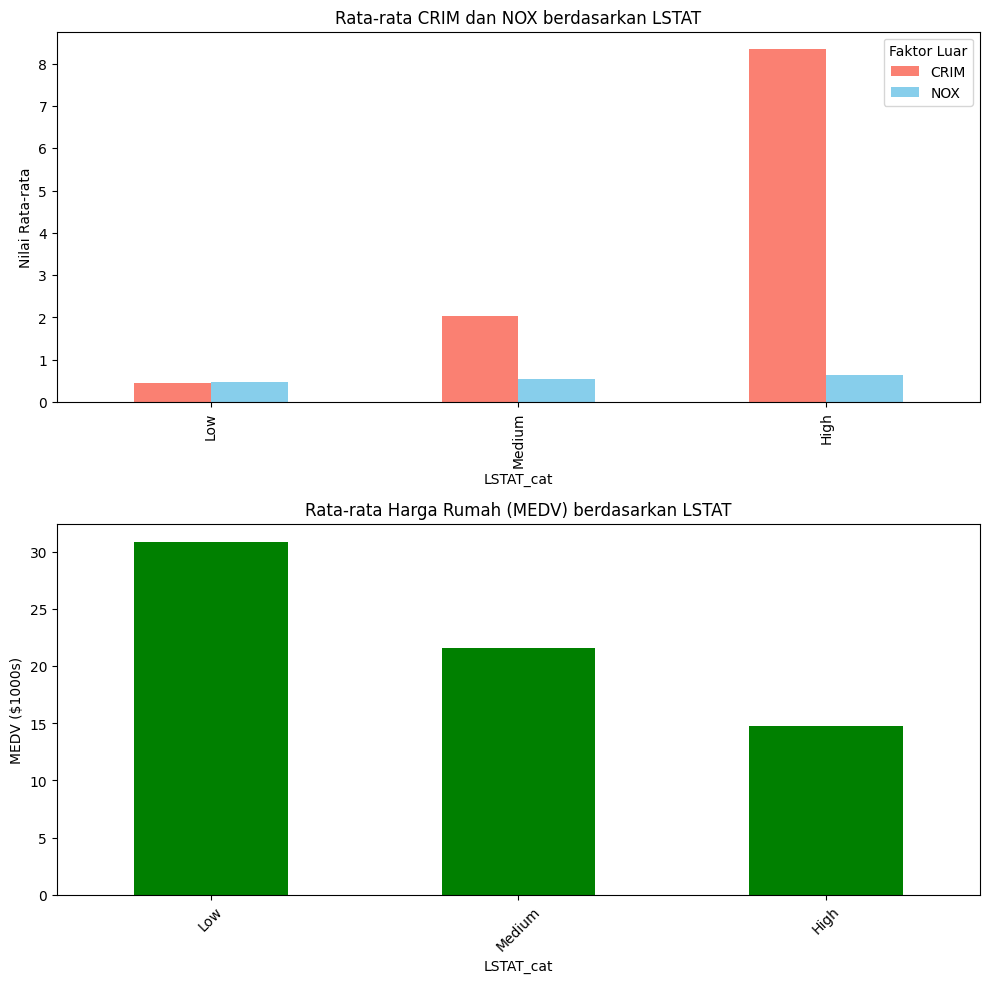

In [21]:
# Bagi LSTAT menjadi 3 kategori (Low, Medium, High) berdasarkan quantile
df_boston_raw["LSTAT_cat"] = pd.qcut(df_boston_raw["LSTAT"], q=3, labels=["Low", "Medium", "High"])

# Hitung rata-rata CRIM, NOX, MEDV per kategori LSTAT
grouped = df_boston_raw.groupby("LSTAT_cat")[["CRIM","NOX","MEDV"]].mean()

# Plot figure
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# Plot CRIM & NOX
grouped[["CRIM","NOX"]].plot(kind="bar", ax=axes[0], color=["salmon","skyblue"])
axes[0].set_title("Rata-rata CRIM dan NOX berdasarkan LSTAT")
axes[0].set_ylabel("Nilai Rata-rata")
axes[0].legend(title="Faktor Luar")

# Plot MEDV
grouped["MEDV"].plot(kind="bar", ax=axes[1], color="green")
axes[1].set_title("Rata-rata Harga Rumah (MEDV) berdasarkan LSTAT")
axes[1].set_ylabel("MEDV ($1000s)")

plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

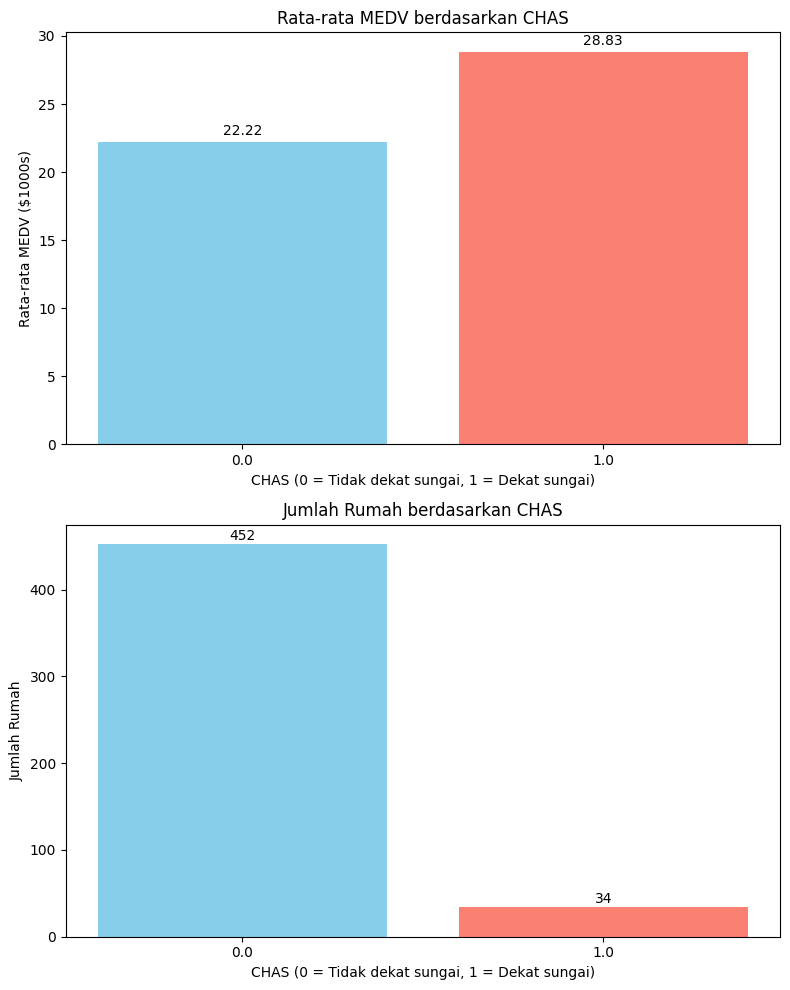

In [7]:
# Hitung rata-rata MEDV per kategori CHAS
chas_group = df_boston_raw.groupby("CHAS")["MEDV"].mean()

# Hitung jumlah rumah per kategori CHAS
chas_count = df_boston_raw["CHAS"].value_counts().sort_index()

fig, axes = plt.subplots(2, 1, figsize=(8,10))  # 2 baris, 1 kolom

# Plot rata-rata MEDV
axes[0].bar(chas_group.index.astype(str), chas_group.values, color=["skyblue","salmon"])
axes[0].set_title("Rata-rata MEDV berdasarkan CHAS")
axes[0].set_xlabel("CHAS (0 = Tidak dekat sungai, 1 = Dekat sungai)")
axes[0].set_ylabel("Rata-rata MEDV ($1000s)")
for i, v in enumerate(chas_group.values):
    axes[0].text(i, v+0.5, f"{v:.2f}", ha='center')

# Plot jumlah rumah
axes[1].bar(chas_count.index.astype(str), chas_count.values, color=["skyblue","salmon"])
axes[1].set_title("Jumlah Rumah berdasarkan CHAS")
axes[1].set_xlabel("CHAS (0 = Tidak dekat sungai, 1 = Dekat sungai)")
axes[1].set_ylabel("Jumlah Rumah")
for i, v in enumerate(chas_count.values):
    axes[1].text(i, v+5, str(v), ha='center')

plt.tight_layout()
plt.show()

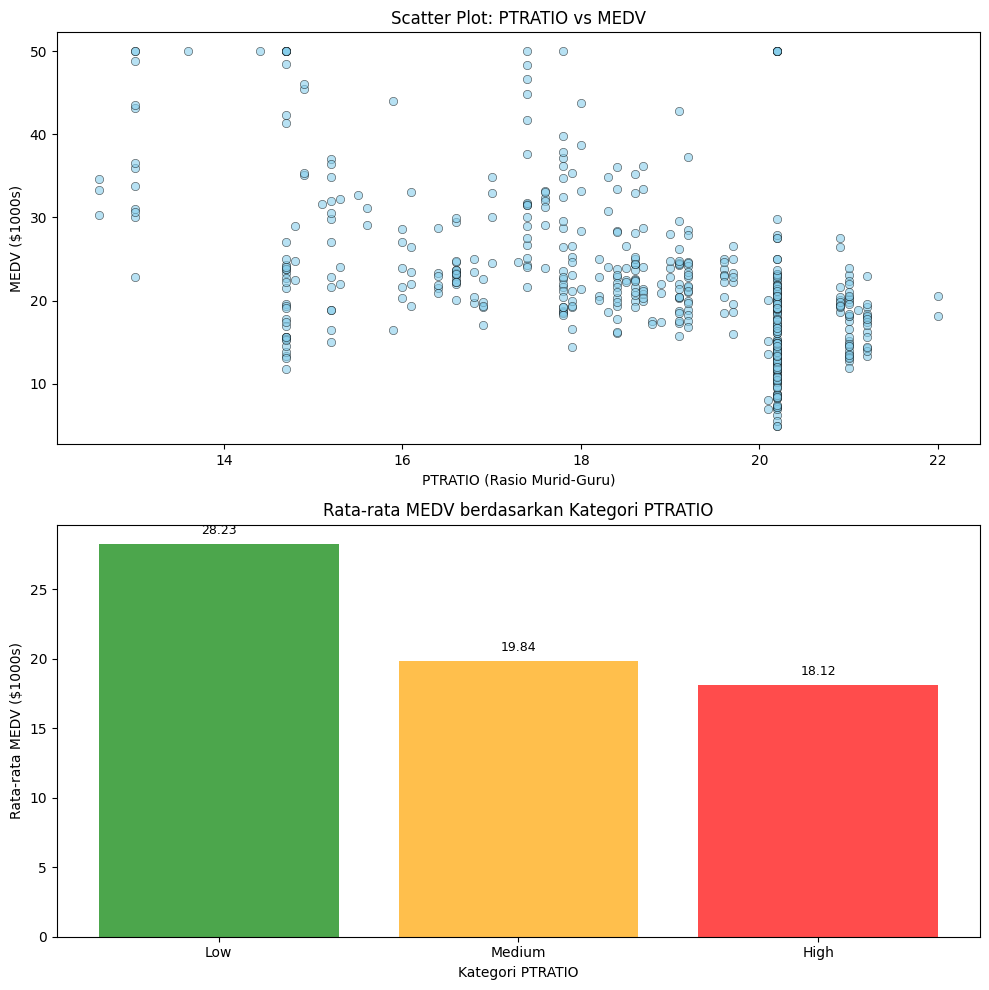

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# Scatter plot
sns.scatterplot(data=df_boston_raw, x="PTRATIO", y="MEDV", alpha=0.6, color="skyblue", edgecolor="k", ax=axes[0])
axes[0].set_title("Scatter Plot: PTRATIO vs MEDV")
axes[0].set_xlabel("PTRATIO (Rasio Murid-Guru)")
axes[0].set_ylabel("MEDV ($1000s)")

# Bagi PTRATIO menjadi 3 kategori (Low, Medium, High)
df_boston_raw["PTRATIO_cat"] = pd.qcut(df_boston_raw["PTRATIO"], q=3, labels=["Low", "Medium", "High"])

# Hitung rata-rata MEDV per kategori PTRATIO
ptr_group = df_boston_raw.groupby("PTRATIO_cat")["MEDV"].mean()

# Bar chart rata-rata harga rumah
bars = axes[1].bar(ptr_group.index, ptr_group.values, color=["green","orange","red"], alpha=0.7)
axes[1].set_title("Rata-rata MEDV berdasarkan Kategori PTRATIO")
axes[1].set_xlabel("Kategori PTRATIO")
axes[1].set_ylabel("Rata-rata MEDV ($1000s)")

# Label nilai di atas bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}", 
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

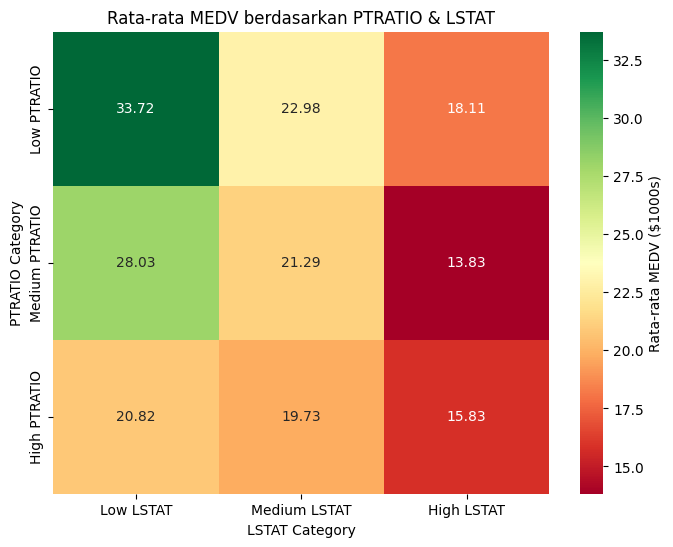

In [24]:
# Binning untuk PTRATIO dan LSTAT
df_boston_raw["PTRATIO_bin"] = pd.qcut(df_boston_raw["PTRATIO"], q=3, labels=["Low PTRATIO","Medium PTRATIO","High PTRATIO"])
df_boston_raw["LSTAT_bin"] = pd.qcut(df_boston_raw["LSTAT"], q=3, labels=["Low LSTAT","Medium LSTAT","High LSTAT"])

# Grouping rata-rata MEDV
grouped = df_boston_raw.groupby(["PTRATIO_bin", "LSTAT_bin"])["MEDV"].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(grouped, annot=True, fmt=".2f", cmap="RdYlGn", cbar_kws={'label': 'Rata-rata MEDV ($1000s)'})
plt.title("Rata-rata MEDV berdasarkan PTRATIO & LSTAT")
plt.ylabel("PTRATIO Category")
plt.xlabel("LSTAT Category")
plt.show()

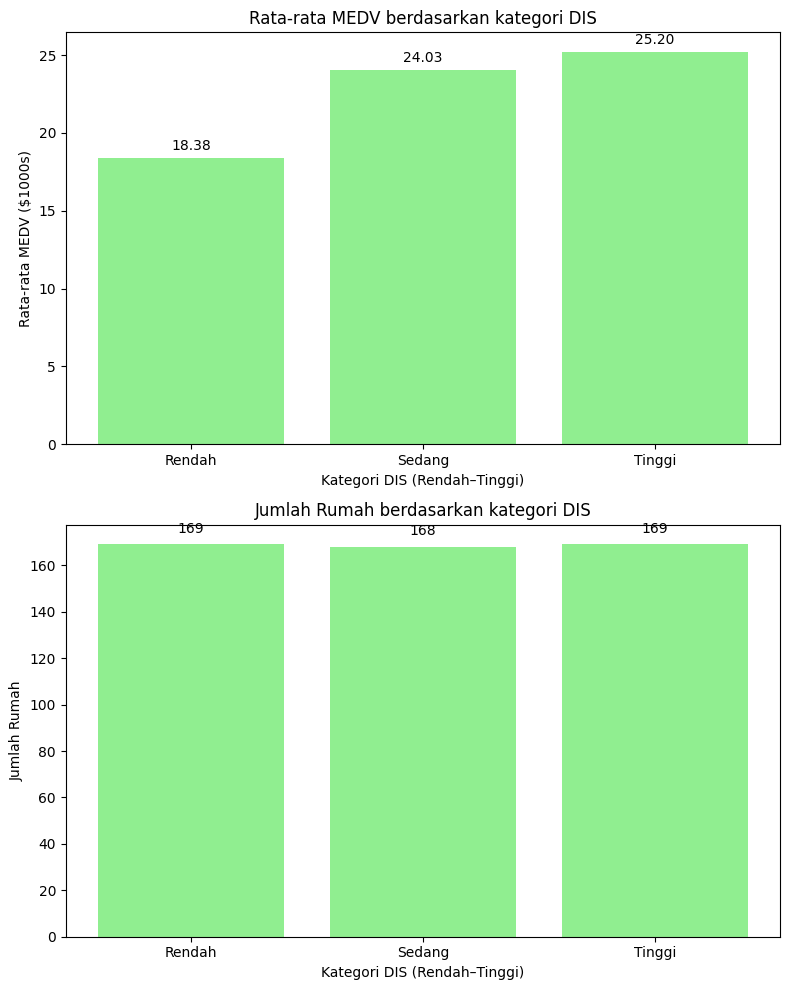

In [8]:
# Buat kategori DIS → rendah, sedang, tinggi (pakai qcut = pembagian kuantil)
df_boston_raw["DIS_cat"] = pd.qcut(df_boston_raw["DIS"], q=3, labels=["Rendah","Sedang","Tinggi"])

# Hitung rata-rata MEDV dan jumlah rumah per kategori DIS
dis_group = df_boston_raw.groupby("DIS_cat")["MEDV"].mean()
dis_count = df_boston_raw["DIS_cat"].value_counts().sort_index()

fig, axes = plt.subplots(2, 1, figsize=(8,10))

# Bar rata-rata MEDV per kategori DIS
axes[0].bar(dis_group.index, dis_group.values, color="lightgreen")
axes[0].set_title("Rata-rata MEDV berdasarkan kategori DIS")
axes[0].set_xlabel("Kategori DIS (Rendah–Tinggi)")
axes[0].set_ylabel("Rata-rata MEDV ($1000s)")
for i, v in enumerate(dis_group.values):
    axes[0].text(i, v+0.5, f"{v:.2f}", ha='center')

# Bar jumlah rumah per kategori DIS
axes[1].bar(dis_count.index, dis_count.values, color="lightgreen")
axes[1].set_title("Jumlah Rumah berdasarkan kategori DIS")
axes[1].set_xlabel("Kategori DIS (Rendah–Tinggi)")
axes[1].set_ylabel("Jumlah Rumah")
for i, v in enumerate(dis_count.values):
    axes[1].text(i, v+5, str(v), ha='center')

plt.tight_layout()
plt.show()

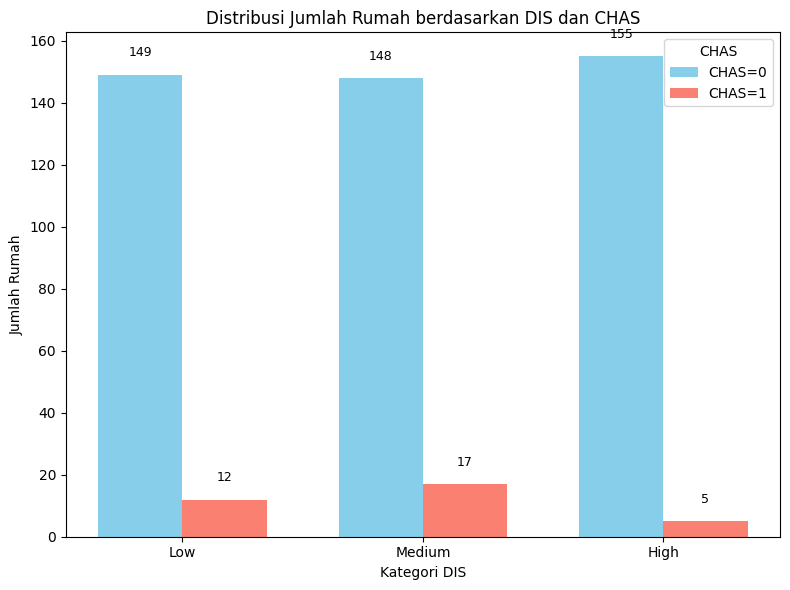

In [12]:
# Buat kategori DIS (Low, Medium, High)
df_boston_raw["DIS_cat"] = pd.qcut(df_boston_raw["DIS"], q=3, labels=["Low", "Medium", "High"])

# Hitung jumlah rumah per kategori DIS & CHAS
count_data = df_boston_raw.groupby(["DIS_cat", "CHAS"]).size().unstack(fill_value=0)

# Plot grouped bar
fig, ax = plt.subplots(figsize=(8,6))

x = np.arange(len(count_data.index))  # posisi kategori DIS
width = 0.35  # lebar bar

bars1 = ax.bar(x - width/2, count_data[0], width, label="CHAS=0", color="skyblue")
bars2 = ax.bar(x + width/2, count_data[1], width, label="CHAS=1", color="salmon")

# Tambahkan label nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                ha='center', va='bottom', fontsize=9)

ax.set_title("Distribusi Jumlah Rumah berdasarkan DIS dan CHAS")
ax.set_xlabel("Kategori DIS")
ax.set_ylabel("Jumlah Rumah")
ax.set_xticks(x)
ax.set_xticklabels(count_data.index)
ax.legend(title="CHAS")
plt.tight_layout()
plt.show()

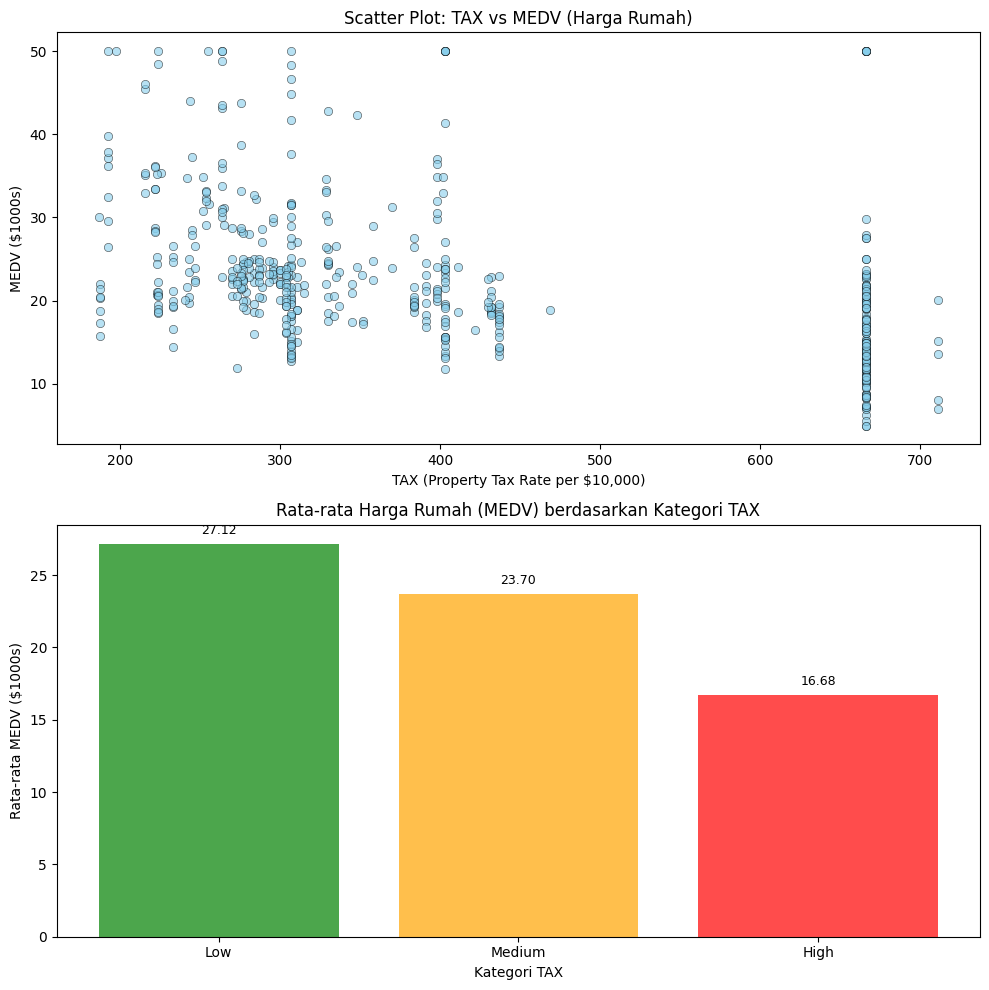

In [22]:

fig, axes = plt.subplots(2, 1, figsize=(10,10))

# Scatter TAX vs MEDV
sns.scatterplot(data=df_boston_raw, x="TAX", y="MEDV", alpha=0.6, ax=axes[0], color="skyblue", edgecolor="k")
axes[0].set_title("Scatter Plot: TAX vs MEDV (Harga Rumah)")
axes[0].set_xlabel("TAX (Property Tax Rate per $10,000)")
axes[0].set_ylabel("MEDV ($1000s)")

# Bagi TAX menjadi 3 kategori (Low, Medium, High) berdasarkan quantile
df_boston_raw["TAX_cat"] = pd.qcut(df_boston_raw["TAX"], q=3, labels=["Low", "Medium", "High"])

# Hitung rata-rata harga rumah untuk tiap kategori TAX
tax_group = df_boston_raw.groupby("TAX_cat")["MEDV"].mean()

# Bar chart rata-rata harga rumah
bars = axes[1].bar(tax_group.index, tax_group.values, color=["green","orange","red"], alpha=0.7)
axes[1].set_title("Rata-rata Harga Rumah (MEDV) berdasarkan Kategori TAX")
axes[1].set_xlabel("Kategori TAX")
axes[1].set_ylabel("Rata-rata MEDV ($1000s)")

# Label nilai di atas bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}", 
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [11]:
df_boston_raw.loc[(df_boston_raw['TAX'] > 500) & (df_boston_raw['MEDV'] < 32)].describe()
# Jenis rumah yang tingga di lingkungan pedesaan(dilihat dari populasi yang rendah) namun termasuk rumah tua
# Memiliki kualitas pendidikan yang sebenernya tidak bagus karena 1 guru perlu mengajar 20 murid 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,125.000000,129.0,127.000000,123.000000,132.000000,132.000000,129.000000,132.000000,132.000000,132.000000,132.000000,132.000000,126.000000,132.000000
mean,12.681766,0.0,18.479528,0.040650,0.671303,6.000689,89.634109,2.085395,23.242424,667.704545,20.196212,287.995606,19.181190,14.994697
std,13.529022,0.0,1.882153,0.198287,0.061816,0.712621,12.718463,0.597438,3.832607,8.623365,0.019163,145.913197,6.539503,5.405825
min,0.105740,0.0,18.100000,0.000000,0.532000,3.561000,40.300000,1.137000,4.000000,666.000000,20.100000,0.320000,5.290000,5.000000
25%,5.441140,0.0,18.100000,0.000000,0.614000,5.674250,85.400000,1.637600,24.000000,666.000000,20.200000,167.375000,14.662500,10.900000
50%,8.982960,0.0,18.100000,0.000000,0.693000,6.139500,94.100000,1.951200,24.000000,666.000000,20.200000,373.740000,18.065000,14.100000
75%,14.333700,0.0,18.100000,0.000000,0.713000,6.407250,98.800000,2.431300,24.000000,666.000000,20.200000,395.355000,23.285000,19.200000
max,88.976200,0.0,27.740000,1.000000,0.770000,8.780000,100.000000,4.098300,24.000000,711.000000,20.200000,396.900000,37.970000,29.800000


In [12]:
df_boston_raw.query('MEDV == 50')
# plt.xticks(rotation=45)   # bisa diganti 30, 60, 90 sesuai kebutuhan
# plt.tight_layout()
# plt.show()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,NaN,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,NaN,2.46,0.0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0


## Handling missing value dan outlier

In [4]:
df_boston_raw.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

- IQR
- ZScore
- Percentile dicut
- Log
- Standarscaler

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_boston_raw[df_boston_raw.columns] = imputer.fit_transform(df_boston_raw)

In [23]:
df_boston_raw.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [24]:
# (A) Buang baris dengan MEDV = 50 (censoring problem)
df_boston_raw = df_boston_raw[df_boston_raw['MEDV'] < 50].copy()

# (B) Winsorize hanya untuk fitur yang dipilih


def winsorize_iqr(frame, cols):
    f = frame.copy()
    for c in cols:
        Q1 = f[c].quantile(0.25)
        Q3 = f[c].quantile(0.75)
        IQR = Q3 - Q1
        lo, hi = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        f[c] = f[c].clip(lo, hi)
    return f


features = ['RM', 'PTRATIO', 'LSTAT', 'CRIM', 'TAX', 'INDUS', 'NOX']
df_boston_raw = winsorize_iqr(df_boston_raw, features)

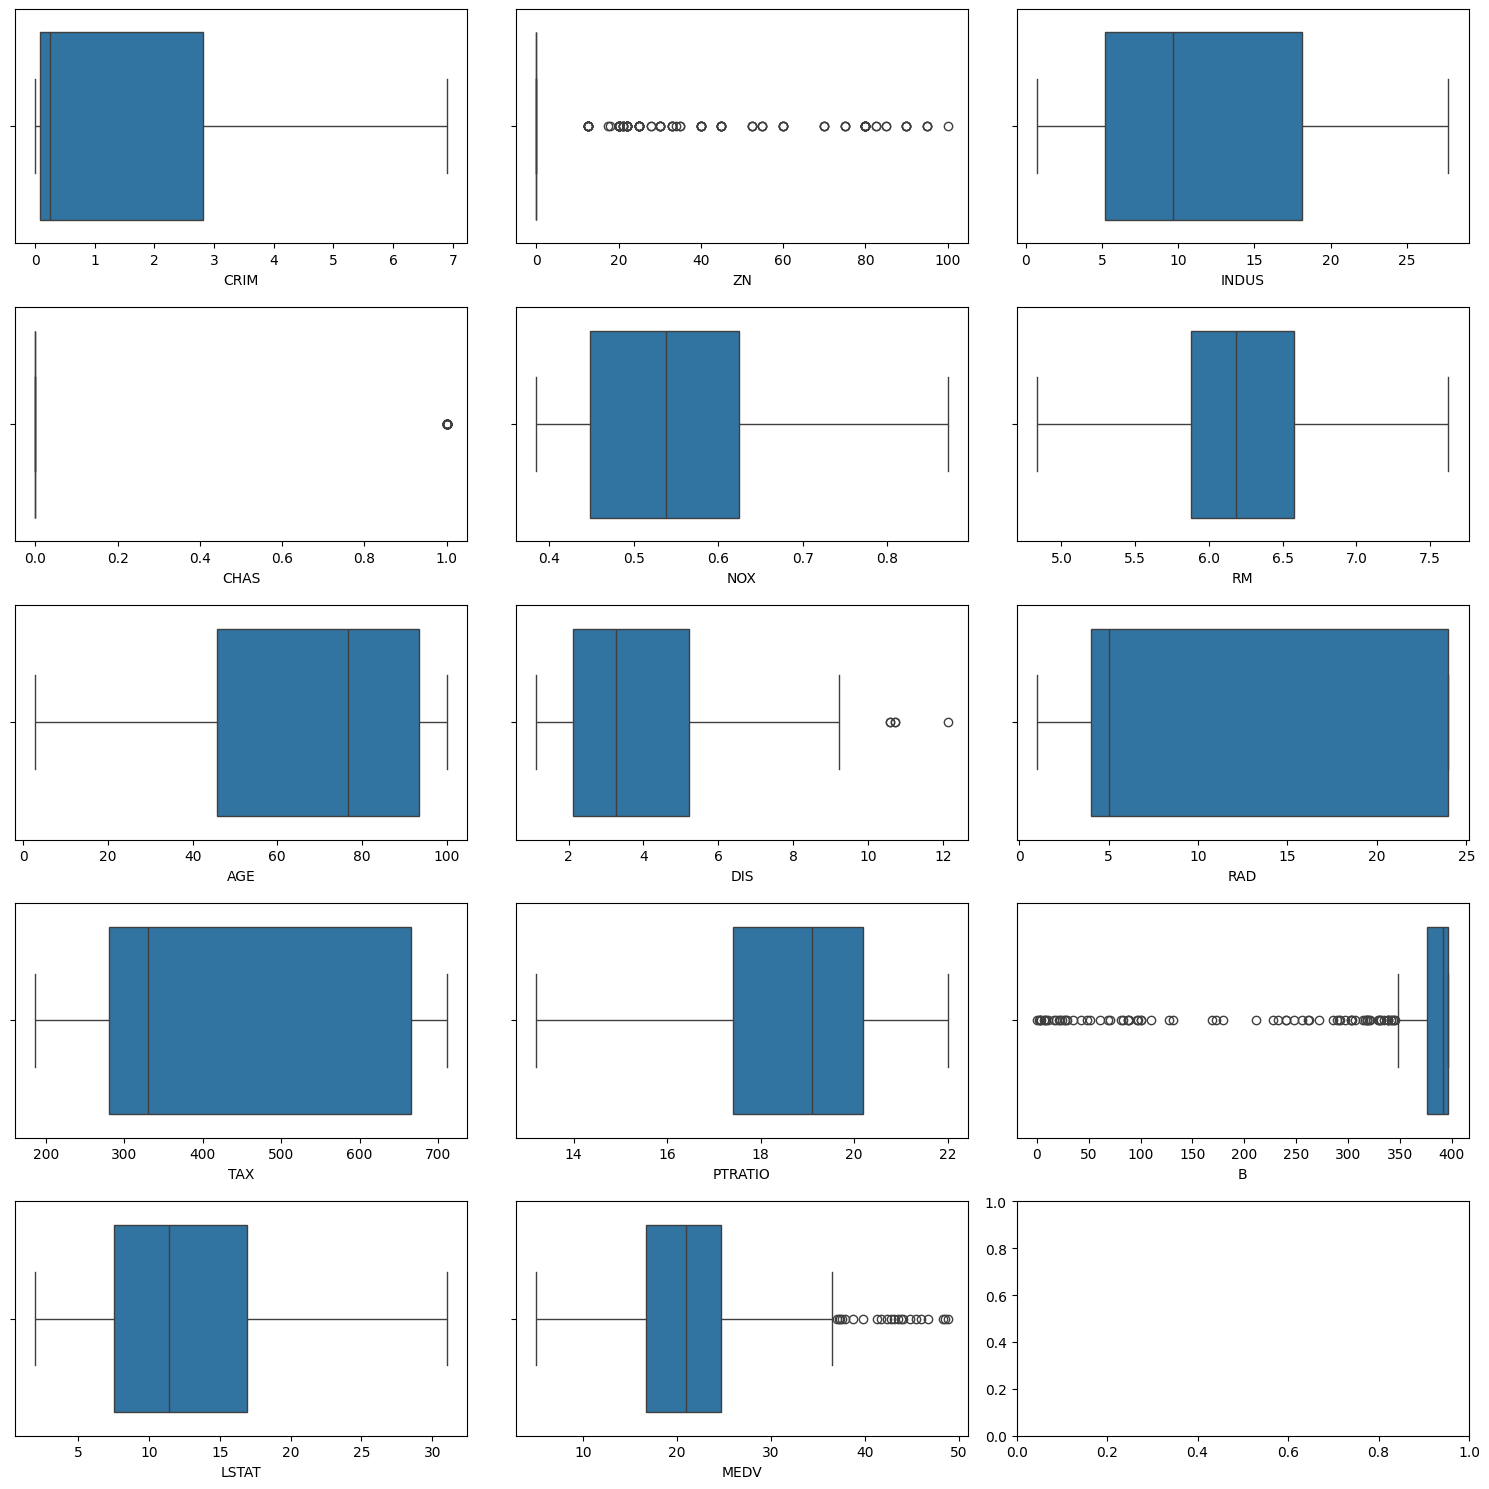

In [26]:
# Create a figure and a set of subplots with as many rows as needed and 3 columns
# Calculate the number of rows needed
num_rows = (len(df_boston_raw.columns) + 2) // 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 15))

# Create a boxplot for each column in the DataFrame
for i, col in enumerate(df_boston_raw.columns):
    sns.boxplot(data=df_boston_raw, x=col, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

- Feature penting LSTAT, RM, CRIM, PTRATIO
- Feature oulier CRIM (ekstrim), LSTAT, RM, DIS

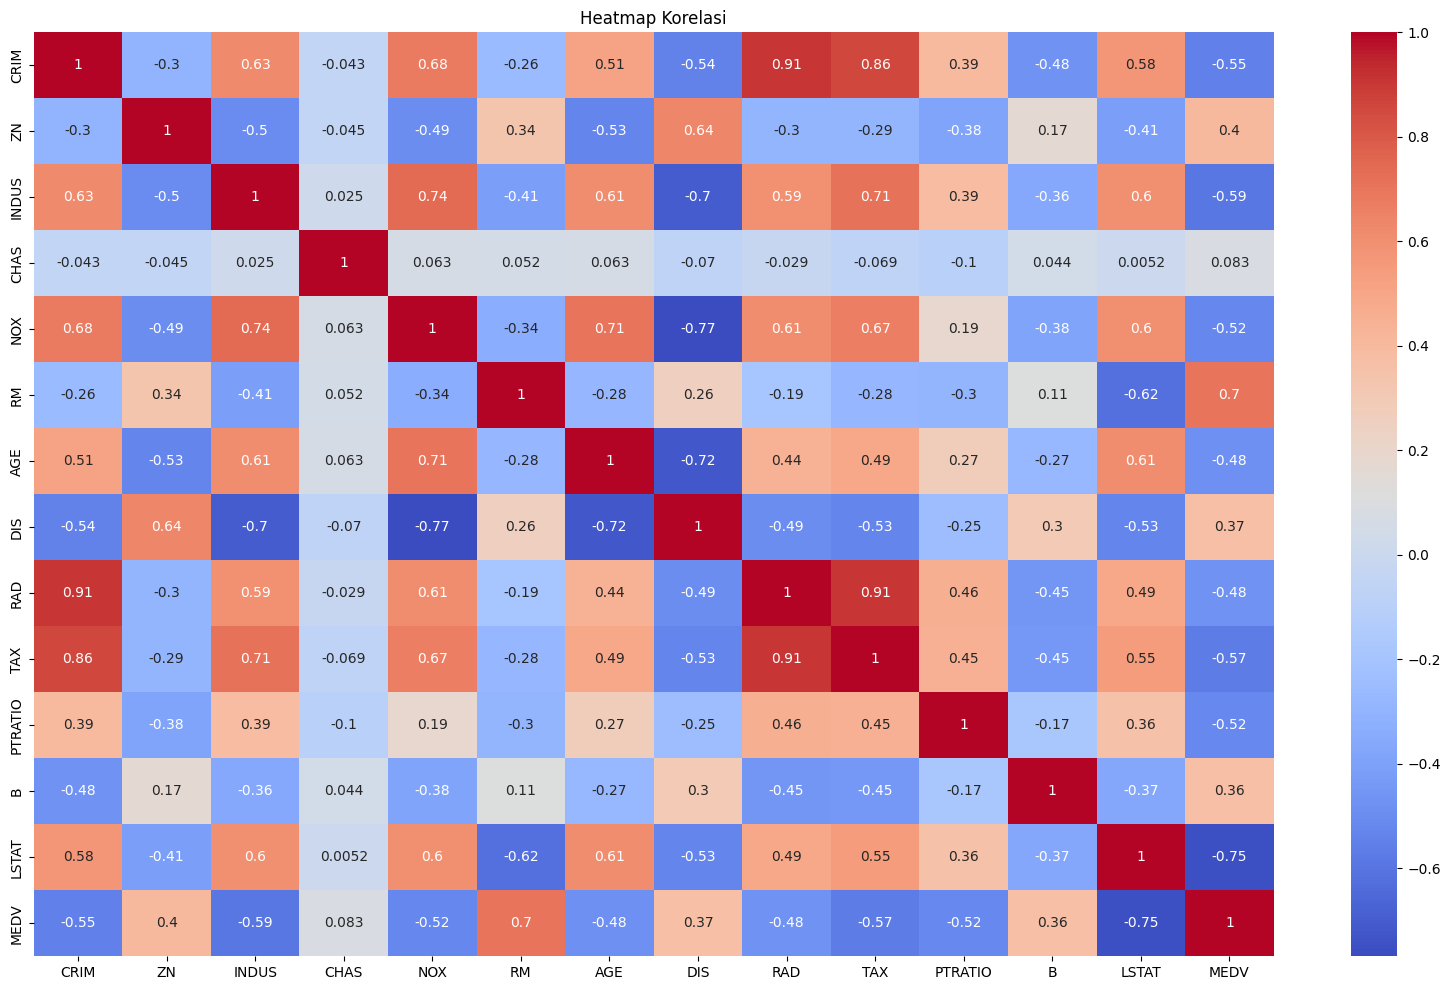

In [25]:
# Korelasi antar variabel
corr = df_boston_raw.corr()

# Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

# Modelling

In [12]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/69/32/eb7e862179194c6440eab63f834a3de064d6340a8b873b5520ac035891db/xgboost-3.0.5-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
def show_feature_importance(model, X_train):
    feat_feature = X_train.columns
    feat_importances = pd.Series(
        model.feature_importances_, index=feat_feature)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [10]:
# ==== Split 80:20 ====
from sklearn.model_selection import train_test_split

X = df_boston_raw[features]
y = df_boston_raw['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape, "Test set:", X_test.shape)

Train set: (392, 7) Test set: (98, 7)


=== Random Forest ===
train Accuracy :  0.9694596334266992
test Accuracy :  0.8640649440397498
R² Score  : 0.8641
RMSE      : 3.1826


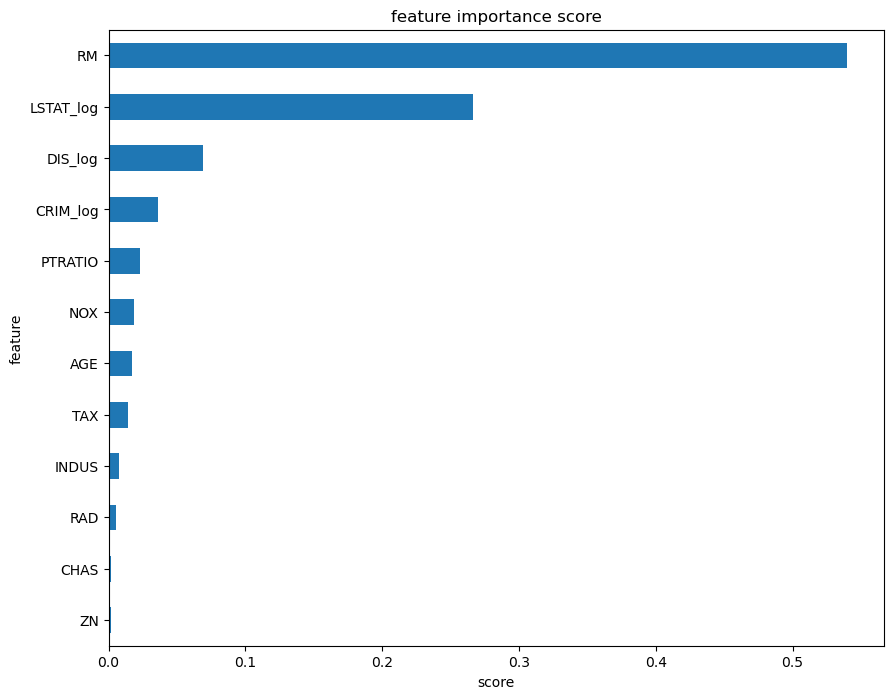

In [63]:
# ==========================
# Model 1: Random Forest
# ==========================
rf_model = RandomForestRegressor(
    n_estimators=100, random_state=42
)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("=== Random Forest ===")
print("train Accuracy : ", rf_model.score(X_train, y_train))
print("test Accuracy : ", rf_model.score(X_test, y_test))
print(f"R² Score  : {r2_rf:.4f}")
print(f"RMSE      : {rmse_rf:.4f}")

show_feature_importance(model=rf_model,
                        X_train=X_train)

In [100]:
y = df_boston_raw['MEDV']
x = df_boston_raw.drop(
    columns=['MEDV', 'CRIM', 'LSTAT', 'TAX_scaled', 'DIS', 'B'])

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [ ]:
# drop(columns=['MEDV', 'CRIM', 'LSTAT', 'TAX_scaled', 'DIS', 'B'])


=== XGBoost ===
train Accuracy :  0.9999367516959521
test Accuracy :  0.8107197690008294
R² Score  : 0.8107
RMSE      : 3.1096


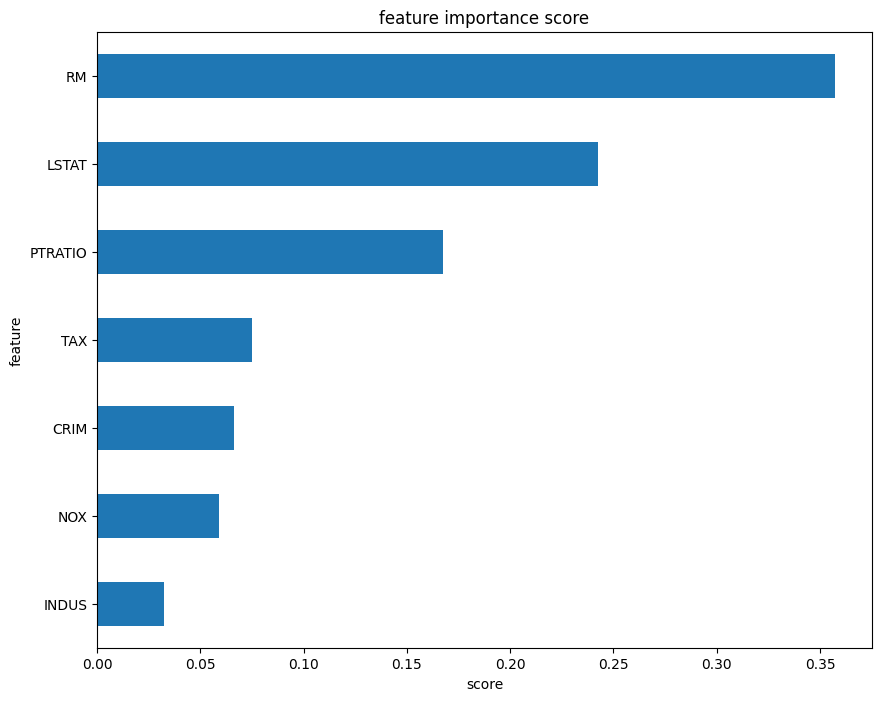

In [27]:
# ==========================
# Model 2: XGBoost
# ==========================
xgb_model = XGBRegressor(
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n=== XGBoost ===")
print("train Accuracy : ", xgb_model.score(X_train, y_train))
print("test Accuracy : ", xgb_model.score(X_test, y_test))
print(f"R² Score  : {r2_xgb:.4f}")
print(f"RMSE      : {rmse_xgb:.4f}")

show_feature_importance(model=xgb_model,
                        X_train=X_train)


=== Grad-Boosting Regressor ===
train Accuracy :  0.9639296488226092
test Accuracy :  0.8504281019419657
R² Score  : 0.8107
RMSE      : 3.1096


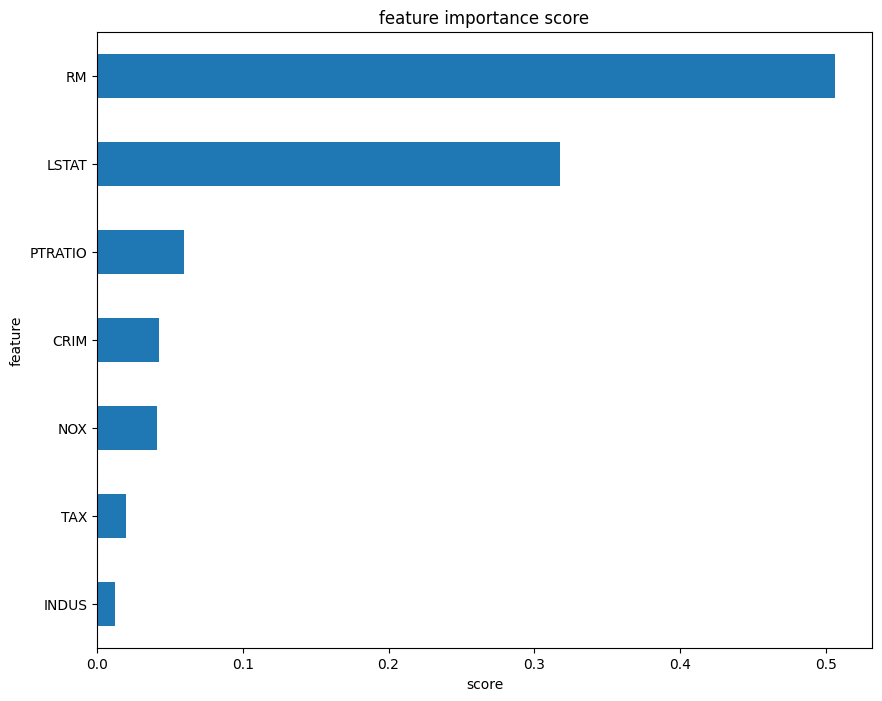

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# ==========================
# Model 3: Gradient Boosting
# ==========================
gb = GradientBoostingRegressor(
    random_state=42
)
gb.fit(X_train, y_train)

# Prediksi
y_pred_gb = gb.predict(X_test)

# Evaluasi
r2_gb = r2_score(y_test, y_pred_xgb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n=== Grad-Boosting Regressor ===")
print("train Accuracy : ", gb.score(X_train, y_train))
print("test Accuracy : ", gb.score(X_test, y_test))
print(f"R² Score  : {r2_gb:.4f}")
print(f"RMSE      : {rmse_gb:.4f}")

show_feature_importance(model=gb,
                        X_train=X_train)

In [16]:
def simple_tuning(model_name, X_train, y_train, X_test, y_test, cv=3, n_iter=10, random_state=42):
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.ensemble import RandomForestRegressor
    from xgboost import XGBRegressor
    
    """
    Simple tuning function for RandomForest, GradientBoosting, and XGBoost.
    - model_name: 'rf', 'gb', 'xgb'
    - cv: cross validation folds
    - n_iter: number of parameter sets to try
    """

    if model_name == 'rf':
        model_label = 'RandomForestRegressor'
        model = RandomForestRegressor(random_state=random_state)
        param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["sqrt", "log2", None]
        }

    elif model_name == 'gb':
        model_label = 'GradientBoostingRegressor'
        model = GradientBoostingRegressor(random_state=random_state)
        param_grid = {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5],
            "subsample": [0.8, 1.0]
        }

    elif model_name == 'xgb':
        model_label = 'XGBRegressor'
        model = XGBRegressor(random_state=random_state,
                             objective="reg:squarederror", verbosity=0)
        param_grid = {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }

    else:
        raise ValueError("Input model name")

    tuner = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        n_jobs=-1,
        random_state=random_state,
        scoring="r2"
    )

    tuner.fit(X_train, y_train)

    best_model = tuner.best_estimator_

    # Evaluasi di test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    show_feature_importance(model=best_model,
                        X_train=X_train)

    print(f"Best params for {model_name.upper()}: {tuner.best_params_}")
    print(f"Best CV Score (R²): {tuner.best_score_:.4f}")
    print('Train score: ' + str(best_model.score(X_train, y_train)))
    print('Test score :' + str(best_model.score(X_test, y_test)))
    print(f"R² (Test) : {r2:.4f}")
    print(f"RMSE      : {rmse:.4f}")
    print(f"MSE       : {mse:.4f}")
    print(f"MAE       : {mae:.4f}")
    print("===================================================================")

 
    # Return model + dataframe ringkasan hasil
    return best_model, tuner.best_score_, mse, mae, rmse

Best params for RF: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best CV Score (R²): 0.8505
Train score: 0.936732986129563
Test score :0.8451466724932759
R² (Test) : 0.8451
RMSE      : 2.8126
MSE       : 7.9107
MAE       : 2.0861


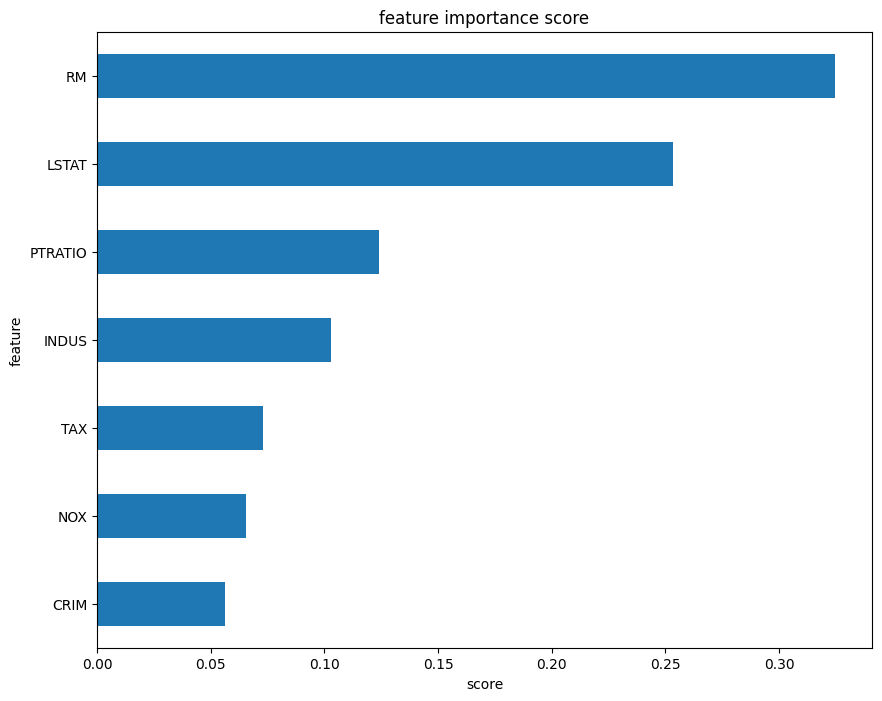

In [32]:
rf_tuning = simple_tuning(model_name='rf', 
                          X_train=X_train,
                          y_train=y_train,
                          X_test=X_test,
                          y_test=y_test)[0]

Best params for XGB: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV Score (R²): 0.8725
Train score: 0.978025934662174
Test score :0.8132895330265808
R² (Test) : 0.8133
RMSE      : 3.0884
MSE       : 9.5382
MAE       : 2.3278


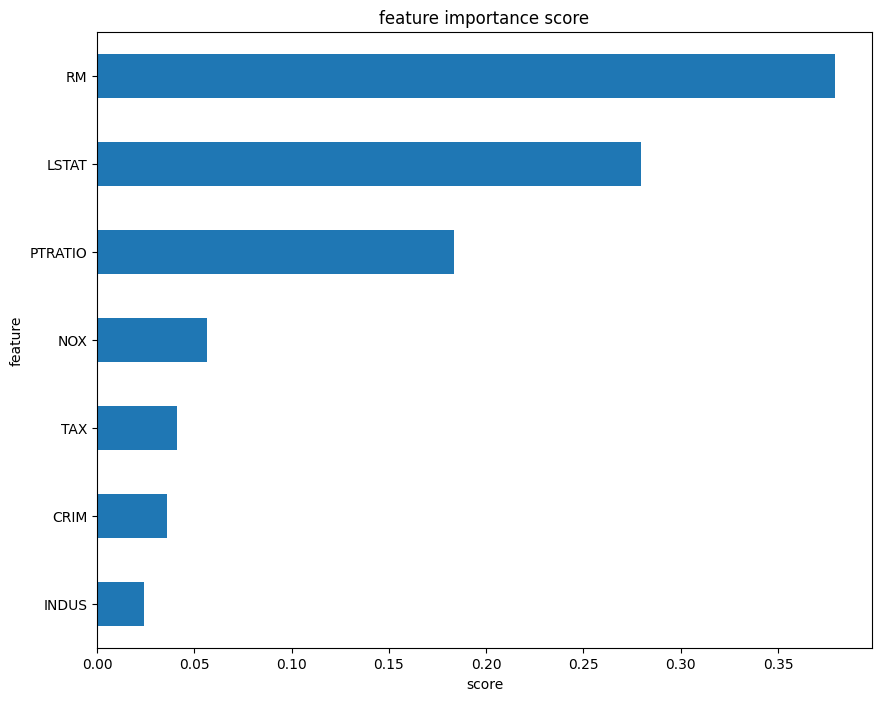

In [28]:
xgb_tuning = simple_tuning(model_name='xgb',
                          X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test)[0]

Best params for GB: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best CV Score (R²): 0.8713
Train score: 0.966435826779427
Test score :0.8310159974959332
R² (Test) : 0.8310
RMSE      : 2.9381
MSE       : 8.6326
MAE       : 2.2641


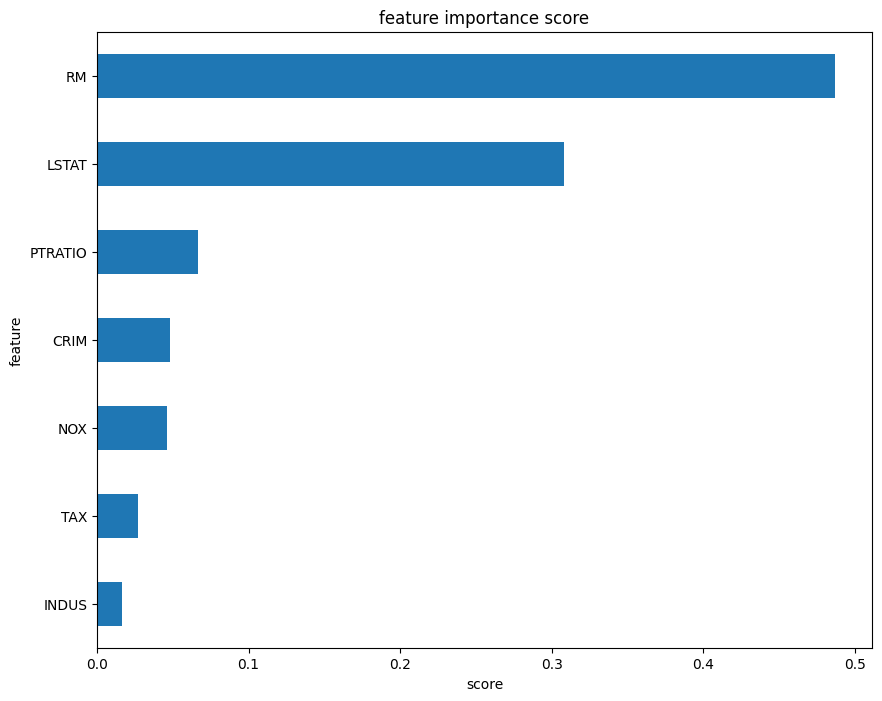

In [33]:
gb_tuning = simple_tuning(model_name='gb',
                          X_train=X_train,
                          y_train=y_train,
                          X_test=X_test,
                          y_test=y_test)[0]

# Evaluation Conclusion

In [95]:
results = pd.DataFrame([
    {
        "Model": "Random Forest",
        "R2 (Tuned)": 0.7783,
        "MAE": 2.1434,
        "RMSE": 3.1432,
        "MSE": 9.8794
    },
    {
        "Model": "Gradient Boosting",
        "R2 (Tuned)": 0.8244,
        "MAE": 1.9851,
        "RMSE": 2.8981,
        "MSE": 8.3988
    },
    {
        "Model": "XGBoost",
        "R2 (Tuned)": 0.8128,
        "MAE": 1.9466,
        "RMSE": 2.6978,
        "MSE": 7.2779
    }
])

results

,Model,R2 (Tuned),MAE,RMSE,MSE
0,Random Forest,0.7783,2.1434,3.1432,9.8794
1,Gradient Boosting,0.8244,1.9851,2.8981,8.3988
2,XGBoost,0.8128,1.9466,2.6978,7.2779


# Ekstrak to pikle

In [30]:
features

['RM', 'PTRATIO', 'LSTAT', 'CRIM', 'TAX', 'INDUS', 'NOX']

In [29]:
import joblib

joblib.dump(xgb_tuning,'xgb_best_model.pkl')

['xgb_best_model.pkl']

In [44]:
model = joblib.load("xgb_best_model.pkl")

# prediksi
y_pred = model.predict(X_test)